In [ ]:
!pip install requests scikit-learn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import csv
import io
import requests


In [ ]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

(331,) (83,)
house_age_pred (80,)
number_stores_pred (80,)
x1 (80, 80)
data_test (6400, 2)
y_pred (6400,)


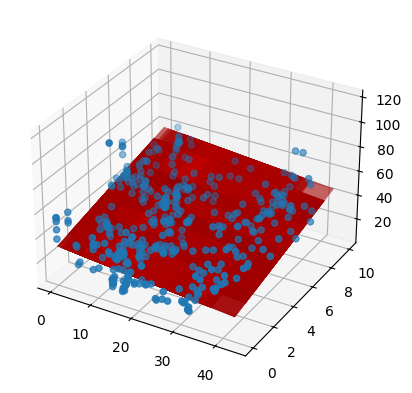

In [269]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import csv
import io
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

data_url = 'https://raw.githubusercontent.com/zhaoyi0113/machine-learning/master/dataset/real_estate.csv'

r = requests.get(data_url)
buff = io.StringIO(r.text)
dr = csv.DictReader(buff, delimiter=',')
type(dr)
data_dic = list(dr)
model = LinearRegression()

data_array = np.array(data_dic)
array = np.array([list(d.values()) for d in data_dic])
house_age = (array[:, 2]).astype(float)
number_stores = (array[:, 4]).astype(float)
price = (array[:, 7]).astype(float)

x = np.vstack((house_age, number_stores))
x = x.T

data=x
target=price
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

print(target_train.shape, target_test.shape)


# 
model.fit(x, price)
house_age_pred=(array[:, 2]).astype(float)[-80:]
number_stores_pred = (array[:, 4]).astype(float)[-80:]

x1, x2 = np.meshgrid(house_age_pred, number_stores_pred)

print("house_age_pred", house_age_pred.shape)
print("number_stores_pred", number_stores_pred.shape)
print("x1", x1.shape)

data_test=np.array([x1.ravel(), x2.ravel()]).T
y_pred = model.predict(data_test)
print('data_test', data_test.shape)

print("y_pred", y_pred.shape)
y_pred=y_pred.reshape(x1.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(x[:, 0], x[:, 1], price)


ax.plot_surface(x1, x2, y_pred, alpha=0.2, color='red')


In [276]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import csv
import io
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

data_url = 'https://raw.githubusercontent.com/zhaoyi0113/machine-learning/master/dataset/real_estate.csv'

r = requests.get(data_url)
buff = io.StringIO(r.text)
dr = csv.DictReader(buff, delimiter=',')
type(dr)
data_dic = list(dr)
model = LinearRegression()

data_array = np.array(data_dic)
array = np.array([list(d.values()) for d in data_dic])
house_age = (array[:, 2]).astype(float)
number_stores = (array[:, 4]).astype(float)
price = (array[:, 7]).astype(float)

x = np.vstack((house_age, number_stores))
x = x.T

data=x
target=price
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

print(data_train.shape, data_test.shape, target_train.shape, target_test.shape)

model = LinearRegression()
model.fit(data_train, target_train)

# Create a grid of points
x = data_test[:, 0]
y = data_test[:, 1]
x, y = np.meshgrid(x, y)

target_pred = model.predict(np.array([x.ravel(), y.ravel()]).T)

print('train:', np.array([x.ravel(), y.ravel()]).T.shape)
print("target_pred", target_pred.shape)
r2_train = r2_score(np.array([x.ravel(), y.ravel()]).T, target_pred)

target_pred = target_pred.reshape(x.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(data_train[:, 0], data_train[:, 1], target_train)
x1, x2 = np.meshgrid(data_test[:,0], data_test[:,1])

ax.plot_surface(x1, x2, target_pred, alpha=0.2, color='red')


(331, 2) (83, 2) (331,) (83,)
train: (6889, 2)
target_pred (6889,)


ValueError: y_true and y_pred have different number of output (2!=1)

In [ ]:
price

In [ ]:
def cost_function(m, apl, theta, x, y):
    # Number of observations
    m = len(x)
    
    # Predicted value
    predictions = theta + np.repeat(apl, m) * x
    
    # Cost
    cost = (1/ (2*m)) * np.sum(np.square(predictions - y))
    # print('cost:', apl, predictions, y, cost)
    plt.plot(x, predictions, marker = 'o', color='green', label='line')
    plt.annotate('apl='+str(apl), xy=(6, predictions[len(predictions)-1]), xytext=(6.2, predictions[len(predictions)-1]))

    return cost
    
# x = np.linspace(-10, 10, 10)
# y = 3*x + 2 + np.random.normal(0, 1, 10)
x=[2,3,4,5,6]
y=[60,70,75,80,85]
plt.scatter(x,y,marker = 'o',label = "Score", color='red')


apl = np.linspace(0, 50, 5)
theta = np.zeros(len(x))
cost_values = np.zeros((len(apl)))
for i, theta0 in enumerate(apl):
  cost_values[i] = cost_function(len(x), apl[i], theta, x, y)
plt.xlabel('Hours')
plt.ylabel('Score')
print("apl:", apl[np.argmin(cost_values)], cost_values.min())

In [ ]:
x=[2,3,4,5,6]
y=[60,70,75,80,85]
plt.scatter(x,y,marker = 'o',label = "Score", color='red')
plt.xlabel('Hours')
plt.ylabel('Score')



In [ ]:
np.linspace(-10, 10, 100).shape
x.shape

In [ ]:
(60+20)*(60+20)+(70+60)*(70+60) + (75+40)*(75+40) + (80+50)*(80+50)+(60+85)*(60+85)

In [ ]:
74450/2.5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Generate some data
np.random.seed(0)
x = np.random.rand(100, 2)  # 100 random pairs of numbers
print("x", x.shape)
y = 3 * x[:, 0] + 2 * x[:, 1] + np.random.randn(100)  # y = 3*x1 + 2*x2 + noise

# Create a linear regression model
model = LinearRegression()
x.shape

# Fit the model to the data
model.fit(x, y)

# Create a grid of points
x1 = np.linspace(0, 1, 10)
print("x1", x1.shape)
x2 = np.linspace(0, 1, 10)
x1, x2 = np.meshgrid(x1, x2)
print("x1", x1.shape)
# Use the model to predict y values for the grid of points
y_pred = model.predict(np.array([x1.ravel(), x2.ravel()]).T)
print("y pred", y_pred.shape)
y_pred=y_pred.reshape(x1.shape)
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(x[:, 0], x[:, 1], y)

# Plot the surface
ax.plot_surface(x1, x2, y_pred, alpha=0.2, color='red')

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
print("pred", y_pred.shape)